# MLP final PJT - Bank.csv
##### Student ID : 210163399   / Name : CHO YEON AN

#### This is a classification problem. From this data, I trained data and predict "churn" which leaves the bank or not.  At Frist, I tried to explore data and focus on the characteristics of data. And then I applied two methods to the data varying a lot of conditions.

In [6]:
import numpy as np
from numpy.testing import assert_array_almost_equal, assert_array_equal
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [7]:
bank = pd.read_csv("Bank.csv", sep=',')
bank

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## 1) EDA

In [8]:
bank.dtypes

customer_id           int64
credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

In [9]:
# find out unique value in each column
for c in bank.columns:
    if c != 'customer_id' and c != 'credit_score':
        print(c , bank[c].unique())

country ['France' 'Spain' 'Germany']
gender ['Female' 'Male']
age [42 41 39 43 44 50 29 27 31 24 34 25 35 45 58 32 38 46 36 33 40 51 61 49
 37 19 66 56 26 21 55 75 22 30 28 65 48 52 57 73 47 54 72 20 67 79 62 53
 80 59 68 23 60 70 63 64 18 82 69 74 71 76 77 88 85 84 78 81 92 83]
tenure [ 2  1  8  7  4  6  3 10  5  9  0]
balance [     0.    83807.86 159660.8  ...  57369.61  75075.31 130142.79]
products_number [1 3 2 4]
credit_card [1 0]
active_member [1 0]
estimated_salary [101348.88 112542.58 113931.57 ...  42085.58  92888.52  38190.78]
churn [1 0]


In [10]:
bank.isnull().sum().to_frame('nan_count')
# don't need to preprocess null or missing value

,nan_count
customer_id,0
credit_score,0
country,0
gender,0
age,0
tenure,0
balance,0
products_number,0
credit_card,0
active_member,0


In [11]:
bank.describe()
# 25% of 'balance' is 0. heavily biased. might preprocess 'balance' column

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [12]:
bank_cp = bank.copy()
bank_cp.drop(['customer_id'], axis=1, inplace=True) #drop because this column is unique column

In [13]:
# preprocess categorical data to binary columns
credit_score = np.array(bank['credit_score'])
country = np.array(bank['country'])
country_FR = np.where(country == 'France', 1, 0).astype(int)
country_GE = np.where(country == 'Germany', 1, 0).astype(int)
country_SP = np.where(country == 'Spain', 1, 0).astype(int)
gender = np.array(bank['gender'])
gender_M = np.where(gender == 'Male', 1, 0).astype(int)
gender_F = np.where(gender == 'Female', 1, 0).astype(int)
age = np.array(bank['age'])
tenure = np.array(bank['tenure'])
balance = np.array(bank['balance'])
products_number = np.array(bank['products_number'])
credit_card = np.array(bank['credit_card'])
active_member = np.array(bank['active_member'])
estimated_salary = np.array(bank['estimated_salary'])
churn = np.array(bank['churn'])



In [14]:
bank_cp['country_FR'] = country_FR
bank_cp['country_GE'] = country_GE
bank_cp['country_SP'] = country_SP
bank_cp['gender_M'] = gender_M
bank_cp['gender_F'] = gender_F

In [15]:
# standise input matrix
# standised value = (original value - mean) / standard deviation  (by row)
def standardise(data_matrix):
    row_of_means = np.mean(data_matrix, axis=0)
    standardised_matrix = data_matrix - row_of_means
    row_of_stds = np.std(standardised_matrix, axis=0)
    return (standardised_matrix / row_of_stds), row_of_means, row_of_stds

In [16]:
# back to a original matrix from a standised matrix 
def de_standardise(standardised_matrix, row_of_means, row_of_stds):
    matrix = np.copy(standardised_matrix * row_of_stds)
    return matrix + row_of_means

In [17]:
# separate input variables and the taget variable
# standise input variables
input_var = np.c_[credit_score, age, tenure, balance,products_number, credit_card, active_member, estimated_salary 
                  ,country_FR, country_GE, country_SP, gender_M, gender_F]
target_var = churn.reshape(-1, 1)
input_std, row_of_means, row_of_stds = standardise(input_var)

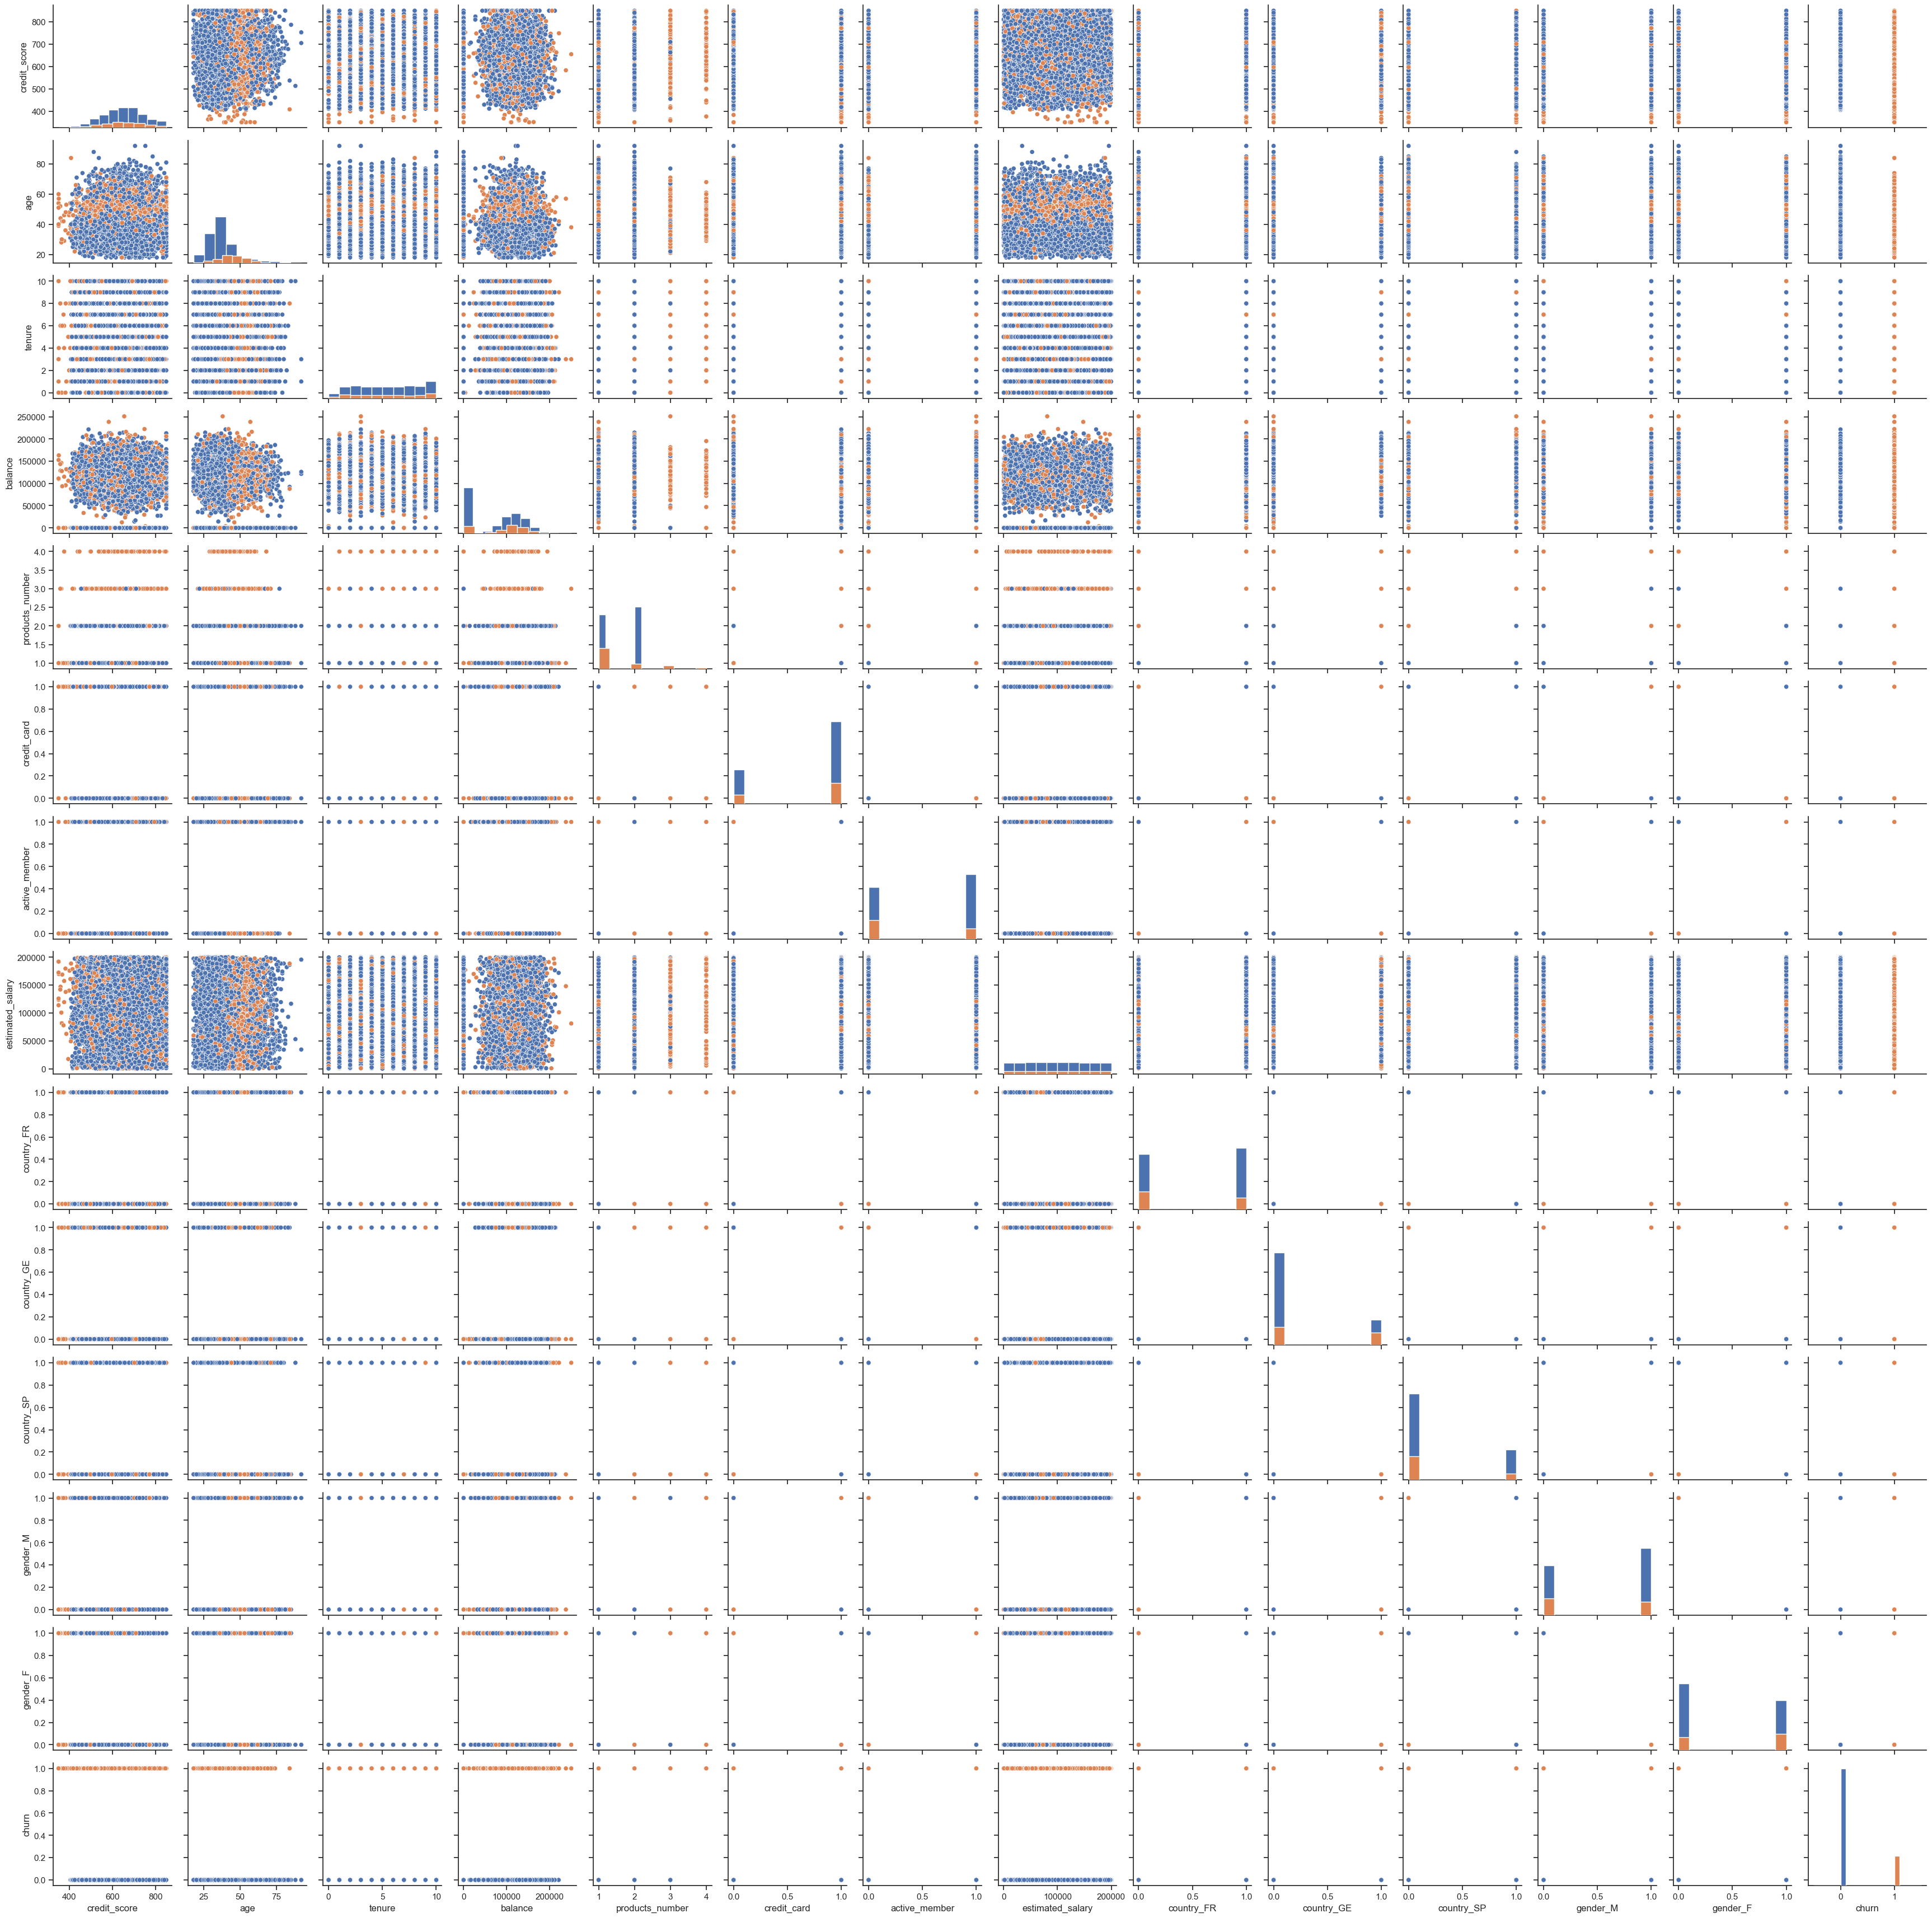

In [18]:
# let's see the relation among all varables
def plot_bank(data_input, data_output):
    characteristics_names = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'credit_card', 
                             'active_member', 'estimated_salary','country_FR', 'country_GE', 'country_SP', 
                             'gender_M', 'gender_F']
    number_of_characteristics = data_input.shape[1]
    de_standardised = de_standardise(data_input, row_of_means, row_of_stds)
    df = pd.DataFrame(data=de_standardised,columns=characteristics_names)
    df['churn'] = data_output
    sns.set_theme(style="ticks", color_codes=True)
    g = sns.PairGrid(df, vars=df[:-1], hue='churn')
    g.map_offdiag(sns.scatterplot)
    g.map_diag(plt.hist)
    plt.show()
    plt.tight_layout
    
plot_bank(input_std, target_var)
# can't see the relation clearly 

                  credit_score       age    tenure   balance  products_number  \
credit_score          1.000000 -0.003965  0.000842  0.006268         0.012238   
age                  -0.003965  1.000000 -0.009997  0.028308        -0.030680   
tenure                0.000842 -0.009997  1.000000 -0.012254         0.013444   
balance               0.006268  0.028308 -0.012254  1.000000        -0.304180   
products_number       0.012238 -0.030680  0.013444 -0.304180         1.000000   
credit_card          -0.005458 -0.011721  0.022583 -0.014858         0.003183   
active_member         0.025651  0.085472 -0.028362 -0.010084         0.009612   
estimated_salary     -0.001384 -0.007201  0.007784  0.012797         0.014204   
churn                -0.027094  0.285323 -0.014001  0.118533        -0.047820   
country_FR           -0.008928 -0.039208 -0.002848 -0.231329         0.001230   
country_GE            0.005538  0.046897 -0.000567  0.401110        -0.010419   
country_SP            0.0047

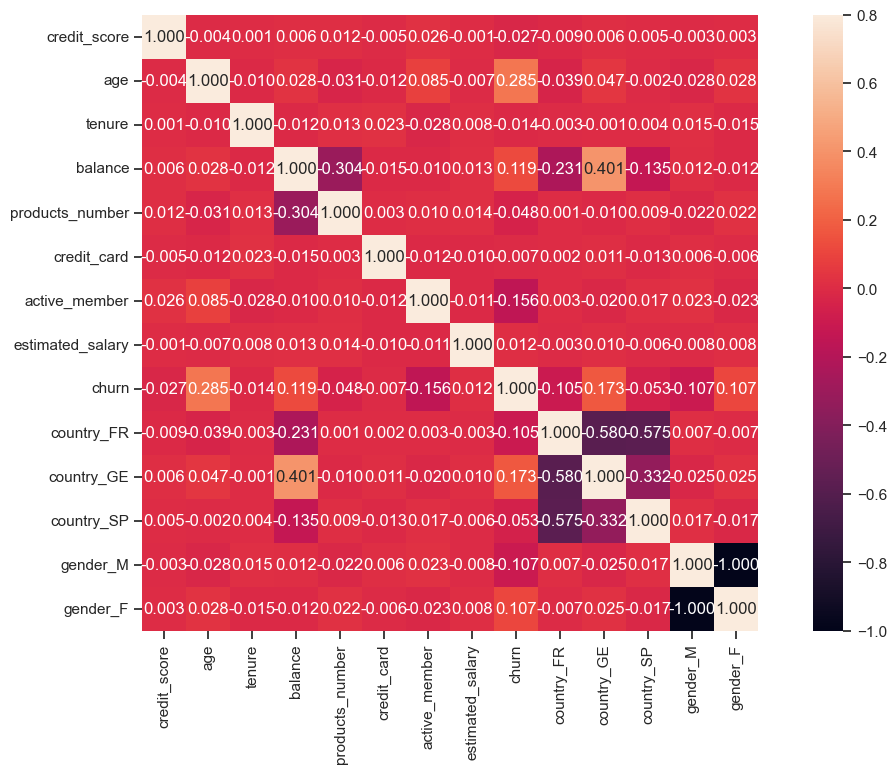

In [19]:
# let's use corr() function to see the relation more clearly
# heatmap - correlation between input variables and target variable

def draw_corrmat(df):
  y_corrmat = df.corr()
  f, ax = plt.subplots(figsize=(14,8))
  print(y_corrmat)
  sns.heatmap(y_corrmat, vmax=.8, annot=True, fmt='.3f', square=True);

draw_corrmat(bank_cp)
# age : strongest agreement with churn
# country_GE :2nd agreement with churn
# balance : 3rd agreement with churn
# active_member : 1st negative agreement with churn

#plt.tight_layout()
#plt.savefig('corr.png')

/Users/choyeonan/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

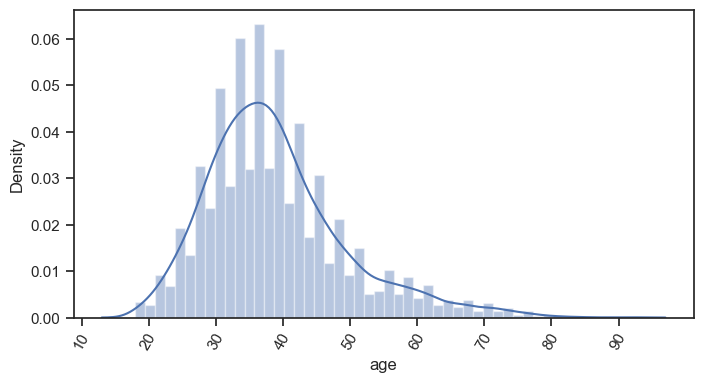

In [20]:
# age is normalised or not?
plt.figure(figsize=(8,4))
plt.xticks(range(0, 100, 10), rotation=60)
sns.distplot(bank_cp['age'])

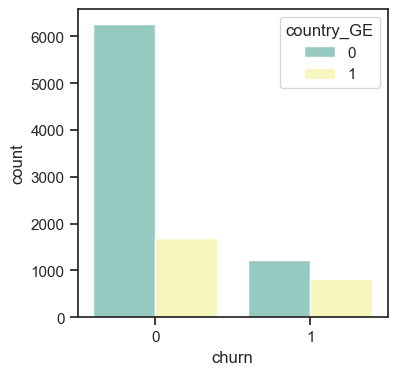

In [21]:
# let's see the country_GE
plt.figure(figsize=(4,4))
cnt=sns.countplot(x='churn',hue='country_GE',data=bank_cp,palette='Set3')
cnt.set_xlabel("churn")
cnt.set_ylabel("count")
plt.show()

In [22]:
ct_ratio = bank.groupby(['country', 'churn'])['customer_id'].count().to_frame()
ct_ratio

customer_id
country churn             
France  0             4204
        1              810
Germany 0             1695
        1              814
Spain   0             2064
        1              413

In [23]:
ct_ratio.columns

Index(['customer_id'], dtype='object')

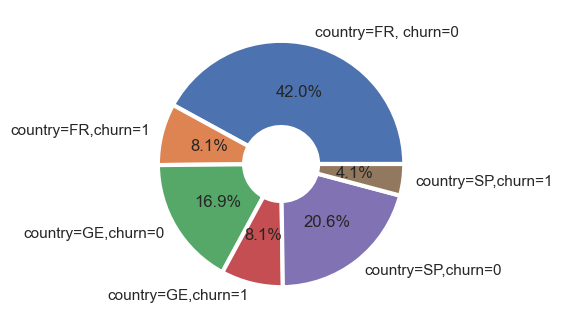

In [24]:
plt.rcParams['figure.figsize'] = [4, 4]
label = ['country=FR, churn=0','country=FR,churn=1','country=GE,churn=0','country=GE,churn=1',
         'country=SP,churn=0','country=SP,churn=1']
wedgeprops= {'width':0.7, 'edgecolor':'w', 'linewidth':3}
plt.pie(ct_ratio['customer_id'], labels=label, autopct='%.1f%%', wedgeprops=wedgeprops)
plt.show()
# GE is the largest leave according to proportion!
# What's characteristic of GE?
# GE has a strong correlation with balance

/Users/choyeonan/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='balance', ylabel='Density'>

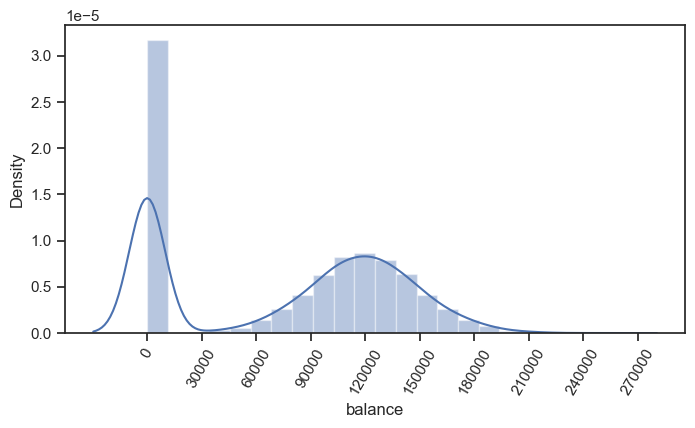

In [25]:
# balance is normalised or not?
plt.figure(figsize=(8,4))
plt.xticks(range(0, 300000, 30000), rotation=60)
sns.distplot(bank_cp['balance'])
# heavily biased as see the describe() above! need to be standised or log transform? etc
# or transform 0 to mean value

#plt.savefig("hist_balance.png")

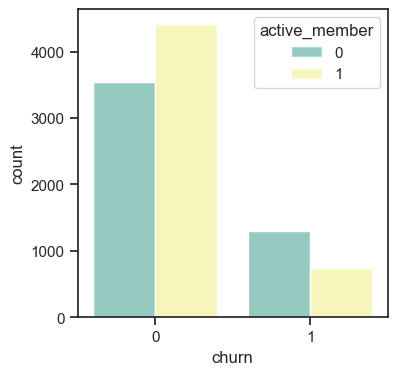

In [26]:
plt.figure(figsize=(4,4))
cnt=sns.countplot(x='churn',hue='active_member',data=bank_cp,palette='Set3')
cnt.set_xlabel("churn")
cnt.set_ylabel("count")
plt.show()
# clearly negative correlation with churn

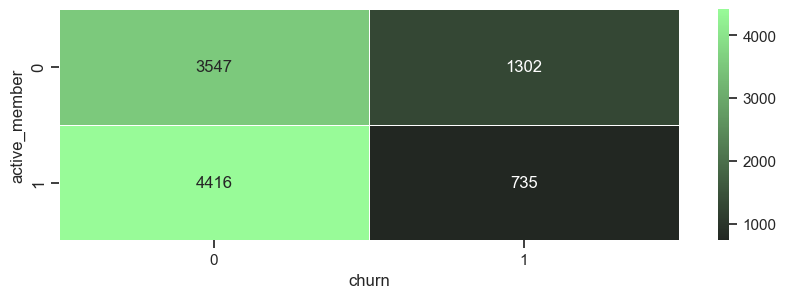

In [27]:
# draw heatmap (active_member) - to see relation between active_member and churn more clearly
ac_his = bank.groupby(['active_member','churn'])['customer_id'].count().unstack()
fig, ax = plt.subplots(figsize=(10,3))
pal = sns.dark_palette("palegreen", as_cmap=True) # color palette 
sns.heatmap(ac_his, 
            annot=True, # display number in each cell
            ax=ax, 
            linewidths=.5, # the width the division between cells
            fmt='.0f', # decimals
            cmap=pal) 
plt.ylabel('active_member')
plt.xlabel('churn')  
plt.yticks(fontsize=12)
plt.show()
# the more active the customer is, the less left the bank!

## 2) Modeling - Binomial Logistic Regression

In [28]:
# log transform input matrix
def log_trans(data_matrix):
    return np.log1p(data_matrix)

In [29]:
# return the linear matrix which the first columns are 1
def linear_regression_data(data_inputs):
    first_column = np.ones((len(data_inputs), 1))
    X_matrix = np.c_[first_column, data_inputs]
    return X_matrix

In [30]:
# return the inner product of linear matrix and weights
def model_function(data_matrix, weights):
    return data_matrix @ weights

In [31]:
# define the sigmoid function that x is equal to the inner product of linear matrix and weights
def logistic_function(inputs):
    #print("test :" ,inputs)
    #print("size :" ,len(inputs))
    return 1 / (1 + np.exp(-inputs))

In [32]:
# return the true if the probability which is the result of sigmoid function is greater than 0.5 in case of vis= 0,
# if vis is not 0, then return the probability - I added this for visualisation
def binary_prediction_function(data_matrix, weights, vis):
    # the binary classification can be obtained by applying the logistic function to the predicted ys i.e., Xw
    # in this first implementation we use classic regression first then use the logistic function later
    probability = logistic_function(model_function(data_matrix, weights))
    if vis == 0:
        return probability > 1/2
    else:
        return probability

In [33]:
# do gradient descent to find out the optimal weights and objective values
def gradient_descent(objective,gradient,initial_weights,step_size=1,no_of_iterations=100,print_output=10):
    
    objective_values = []
    weights = np.copy(initial_weights)
    objective_values.append(objective(weights))
    
    for counter in range(no_of_iterations):
        weights -= step_size * gradient(weights)
        objective_values.append(objective(weights))
                                                                 
    return weights, objective_values

In [34]:
# define cost function
def binary_logistic_regression_cost_function(data_matrix, data_labels,weights):
    regression_outputs = model_function(data_matrix, weights)
    return np.mean(np.log(1 + np.exp(regression_outputs)) -data_labels * regression_outputs)

In [35]:
# define gradient function
def binary_logistic_regression_gradient(data_matrix, data_labels, weights):
    return data_matrix.T @ (logistic_function(model_function(data_matrix, weights)) - data_labels) / len(data_matrix)

In [36]:
def classification_accuracy(estimated_labels, true_labels):
    equal_labels = estimated_labels == true_labels # this returns an array made of true and false 
    return np.mean(equal_labels) # the average is how many true we have

In [37]:
# define KFold index range
def KFold_split(data_size, K):
    np.random.seed(123456789)
    indexes = np.random.permutation(data_size)
    m, r = divmod(data_size, K)
    indexes_split = [
        indexes[i * m + min(i, r):(i + 1) * m + min(i + 1, r)]
        for i in range(K)
    ]
    return indexes_split

# do Binary Logistic Regression with KFold cross valdidation
# modified return value to the accuracy rate, not error rate
# I added the argument 'vis' for the visualisation
# if vis=0 then the original function, if vis=1, then return the labels of test data and the predicted labels of test data 
def KFold_cross_validation_BLR(data_inputs, data_outputs, K, vis):
    
    data_size = len(data_inputs)
    indexes_split = KFold_split(data_size, K)
    
    vis_out_pred = []
    #for visualisation
    if vis !=0:
        vis_input = []
        vis_out_real = []

    average_accuracy = 0
    for i in range(K):
        training_indexes = np.concatenate([indexes_split[j] for j in range(K) if (j != i)])
        
        # do binomial_logistic_regression
        predicted_labels, accuracy = binomial_logistic_regression(
                                             data_inputs[training_indexes],
                                             data_outputs[training_indexes],
                                             data_inputs[indexes_split[i]],
                                             data_outputs[indexes_split[i]],
                                             vis)
        # !!!adding - for visulaisation
        if vis !=0:
            vis_out_real.append(data_outputs[indexes_split[i]])
            
        vis_out_pred.append(predicted_labels)
        average_accuracy += accuracy / K
        
    #error = 1.-average_accuracy
    if vis == 0:
        return average_accuracy  
    else: #for visualisation
        return vis_out_real, vis_out_pred


In [38]:
# define Binomial Logistic Regression with train data and test data from KFold cross validation
def binomial_logistic_regression(input_train, target_train, input_test, target_test, vis):
    
    # do linear regression to input data
    linear_input_train = linear_regression_data(input_train)
    linear_input_test = linear_regression_data(input_test)

    # define the cost function
    cost_function = lambda weights: binary_logistic_regression_cost_function(linear_input_train,
                                                                                 target_train, weights)
    # get the gradient
    gradient_function = lambda weights: binary_logistic_regression_gradient(linear_input_train,
                                                                                target_train, weights)

    # start with weight = 0
    initial_weights = np.zeros((len(linear_input_train.T), 1))

    # set the step size - referred from titanic dataset coursework 
    step_size = 3.9 * len(linear_input_train) / (np.linalg.norm(linear_input_train))**2
    #print("step_size : ",step_size)
    
    # apply gradient descent
    # get optimal weights and objctive values
    optimal_weights, objective_values_ =gradient_descent(cost_function, gradient_function, initial_weights, step_size, 
                                                      2000, 200)
    # get the predict labels
    predicted_labels= binary_prediction_function(linear_input_test, optimal_weights, vis)

    # measure the accuracy comparing predicted labels VS real labels
    accuracy_rate = classification_accuracy(predicted_labels, target_test)
    
    return predicted_labels, accuracy_rate

###  2-1) Manipulating Input variables  &  applying Binomial Logistic Regression
#### case1) all features standised
#### case2) all features log transform
#### main features are defined as input variables which have correlation with 'churn'
#### case3) main features (age, balance, active_member, conuntry_GE) - standised
#### case4) main features  (age, balance, active_member, conuntry_GE) - log_transform
#### case5) main features (age - standised, balance - log_transform, active_member, conuntry_GE - standised) 


In [39]:
# features transformation
# case1
input_var = np.c_[credit_score, age, tenure, balance,products_number, credit_card, active_member, estimated_salary 
                  ,country_FR, country_GE, country_SP, gender_M, gender_F]
target_var = churn.reshape(-1, 1)
input_std, row_of_means, row_of_stds = standardise(input_var)

# case2
input_log = log_trans(input_var)

# case3
input_mf_var = np.c_[age, balance, active_member, country_GE]
input_mf_std, row_of_means, row_of_stds = standardise(input_mf_var)

# case4
input_mf_log = log_trans(input_mf_var)

# case5
# log transform only for 'balance', since log transform is effctive for biased data
input_mf_mix = np.c_[input_mf_std[:,0], input_mf_log[:,1], input_mf_std[:,2], input_mf_std[:,3]]


In [40]:
# Do 5-Fold cross validaion! & do logistic regression!
# step size = 3.9~~~~~~

input_knn_list = [input_std, input_log, input_mf_std, input_mf_log, input_mf_mix]
i=1

for var in input_knn_list:
    print("case",i,") accuracy : " ,KFold_cross_validation_BLR(var, target_var, 5, 0))
    i += 1

# mostly, the accuracy is better at a model with main features standised
# interestingly, only 'balance' log transformed 

case 1 ) accuracy :  0.8109999999999999
case 2 ) accuracy :  0.7966
case 3 ) accuracy :  0.812
case 4 ) accuracy :  0.7963
case 5 ) accuracy :  0.8120999999999999


In [41]:
# Do 5-Fold cross validaion! & do logistic regression!
# step size = 1

input_knn_list = [input_std, input_log, input_mf_std, input_mf_log, input_mf_mix]
i=1

for var in input_knn_list:
    print("case",i,") accuracy : " ,KFold_cross_validation_BLR(var, target_var, 5, 0))
    i += 1

# mostly, the accuracy is better at a model with main features standised
# interestingly, only 'balance' log transformed 

case 1 ) accuracy :  0.8109999999999999
case 2 ) accuracy :  0.7966
case 3 ) accuracy :  0.812
case 4 ) accuracy :  0.7963
case 5 ) accuracy :  0.8120999999999999


###  2-2) Eliminating outliers  &  applying Binomial Logistic Regression
#### case6) after removing outliers(age, balance), all features standised
#### case7) after removing outliers(age, balance), all features log_transform
#### case8) after removing outliers(age, balance), main features (age, balance, active_member) - standised
#### case9) after removing outliers(age, balance), main features (age, balance, active_member) - log_transform
#### case10) after removing outliers(age, balance), main features (age - standised, balance - log_transform, active_member, conuntry_GE - standised)

<AxesSubplot:>

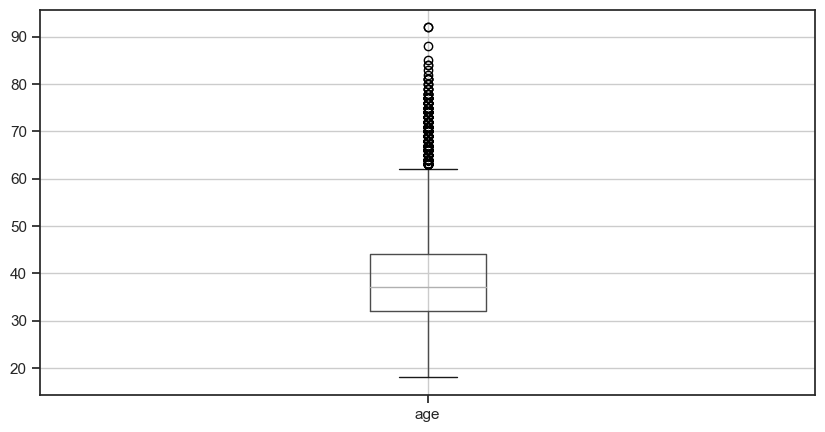

In [42]:
bank.boxplot(column=['age'], figsize=(10,5))
# looks like there are a bit a lot of outliers in 'age'
# also, commonsensically, there are no odd values like under 0 or over 110
# However, let's remove outliers, as there is the strongest correlation bewtween 'age' and 'churn'

<AxesSubplot:title={'center':'age'}, xlabel='churn'>

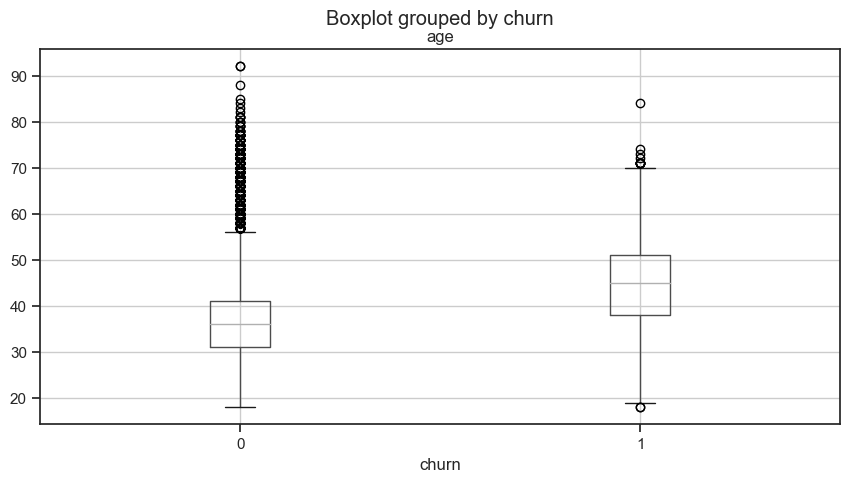

In [43]:
bank.boxplot(column=['age'], by='churn', figsize=(10,5))
# there are so many outliers at 'churn'==0
# therefore, I decide to remove outliers only for 'churn'==1

#plt.savefig("box_age.png")

In [44]:
res_age = bank.groupby("churn")["age"].quantile([0.25, 0.75])
res_age

churn      
0      0.25    31.0
       0.75    41.0
1      0.25    38.0
       0.75    51.0
Name: age, dtype: float64

In [45]:
# Use the formula of 4quantile outlier

step = (res_age[1::2].to_numpy() - res_age[::2].to_numpy())
upper_inner_fence = step*1.5 + res_age[1::2].to_numpy() 
lower_inner_fence  = res_age[0::2].to_numpy()  - step*1.5

print(upper_inner_fence)
print(lower_inner_fence)



[56.  70.5]
[16.  18.5]


In [46]:
ch2 = bank_cp[(bank_cp['churn']==0) & (bank_cp['age']>=lower_inner_fence[0]) & (bank_cp['age']<=upper_inner_fence[0])]
ch2

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_FR,country_GE,country_SP,gender_M,gender_F
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,1,0,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,1,0,0,0,1
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,1,0,1
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0,1,0,0,1,0
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,644,France,Male,28,7,155060.41,1,1,0,29179.52,0,1,0,0,1,0
9994,800,France,Female,29,2,0.00,2,0,0,167773.55,0,1,0,0,0,1
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,1,0,0,1,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,1,0,0,1,0


In [47]:
ch1=bank_cp[(bank_cp['age']>=lower_inner_fence[1]) & (bank_cp['age']<=upper_inner_fence[1]) & (bank_cp['churn']==1)]
ch1

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_FR,country_GE,country_SP,gender_M,gender_F
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,0,0,0,1
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,0,0,0,1
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,0,0,1,1,0
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,0,1,0,0,1
16,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9981,498,Germany,Male,42,3,152039.70,1,1,1,53445.17,1,0,1,0,1,0
9982,655,Germany,Female,46,7,137145.12,1,1,0,115146.40,1,0,1,0,0,1
9991,597,France,Female,53,4,88381.21,1,1,0,69384.71,1,1,0,0,0,1
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,0,0,0,1


In [48]:
print(len(ch2)) # 0 inliers
print(len(bank[(bank_cp['churn']==0)]) - len(ch2)) # 0 outliers
print(len(ch1)) # 1 inliers
print(len(bank[(bank_cp['churn']==1)]) - len(ch1)) # 1 outliers

7477
486
2024
13


In [49]:
ch_list = [ch1, ch2]
ch_all = pd.concat(ch_list, ignore_index=True)
ch_all

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_FR,country_GE,country_SP,gender_M,gender_F
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,0,0,0,1
1,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,0,0,0,1
2,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,0,0,1,1,0
3,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,0,1,0,0,1
4,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9496,644,France,Male,28,7,155060.41,1,1,0,29179.52,0,1,0,0,1,0
9497,800,France,Female,29,2,0.00,2,0,0,167773.55,0,1,0,0,0,1
9498,771,France,Male,39,5,0.00,2,1,0,96270.64,0,1,0,0,1,0
9499,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,1,0,0,1,0


<AxesSubplot:title={'center':'balance'}, xlabel='churn'>

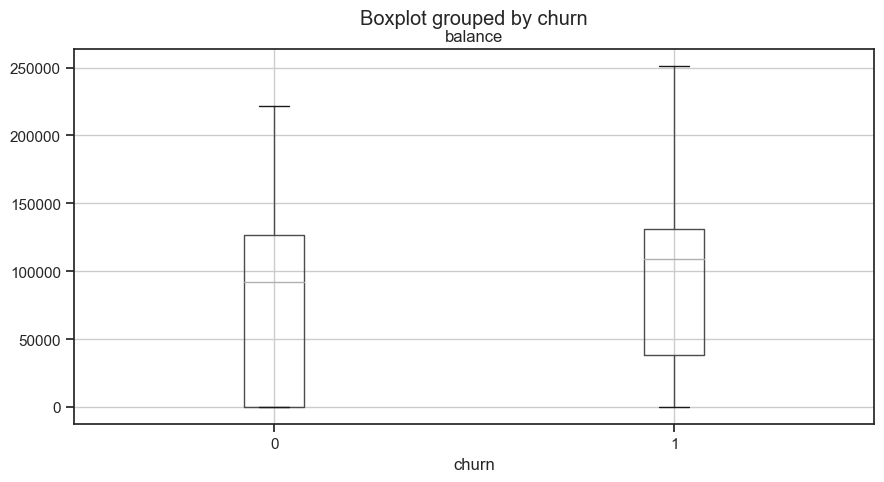

In [50]:
bank.boxplot(column=['balance'], by='churn', figsize=(10,5))
# look like no outliers

In [51]:
# but try to do 4quntile
res_bal1,  res_bal2= bank["balance"].quantile([0.25, 0.75])
print(res_bal1, res_bal2)

0.0 127644.24


In [52]:
# Use the formula of 4quantile outlier

step = (res_bal2 - res_bal1)
upper_inner_fence = step*1.5 + res_bal2
lower_inner_fence  = res_bal1  - step*1.5

print(upper_inner_fence)
print(lower_inner_fence)




319110.60000000003
-191466.36000000002


#### ver1) eliminating outliers not distingusihing 'churn'

In [53]:
bank_rem = ch_all[(ch_all['balance']>=lower_inner_fence) & (ch_all['balance']<=upper_inner_fence)]
bank_rem
# no outliers in 'balance'

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_FR,country_GE,country_SP,gender_M,gender_F
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,0,0,0,1
1,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,0,0,0,1
2,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,0,0,1,1,0
3,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,0,1,0,0,1
4,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9496,644,France,Male,28,7,155060.41,1,1,0,29179.52,0,1,0,0,1,0
9497,800,France,Female,29,2,0.00,2,0,0,167773.55,0,1,0,0,0,1
9498,771,France,Male,39,5,0.00,2,1,0,96270.64,0,1,0,0,1,0
9499,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,1,0,0,1,0


####  2-2-1) after removing outliers not distingusg 'churn' value, apply cases above to model

In [54]:
# preprocess categorical data to binary columns
credit_score = np.array(bank_rem['credit_score'])
country = np.array(bank_rem['country'])
country_FR = np.where(country == 'France', 1, 0).astype(int)
country_GE = np.where(country == 'Germany', 1, 0).astype(int)
country_SP = np.where(country == 'Spain', 1, 0).astype(int)
gender = np.array(bank_rem['gender'])
gender_M = np.where(gender == 'Male', 1, 0).astype(int)
gender_F = np.where(gender == 'Female', 1, 0).astype(int)
age = np.array(bank_rem['age'])
tenure = np.array(bank_rem['tenure'])
balance = np.array(bank_rem['balance'])
products_number = np.array(bank_rem['products_number'])
credit_card = np.array(bank_rem['credit_card'])
active_member = np.array(bank_rem['active_member'])
estimated_salary = np.array(bank_rem['estimated_salary'])
churn = np.array(bank_rem['churn'])


In [55]:
target_var = churn.reshape(-1, 1)

# features transformation
# case6
input_var = np.c_[credit_score, age, tenure, balance,products_number, credit_card, active_member, estimated_salary 
                  ,country_FR, country_GE, country_SP, gender_M, gender_F]
input_std, row_of_means, row_of_stds = standardise(input_var)

# case7
input_log = log_trans(input_var)

# case8
input_mf_var = np.c_[age, balance, active_member, country_GE]
input_mf_std, row_of_means, row_of_stds = standardise(input_mf_var)

# case9
input_mf_log = log_trans(input_mf_var)

# case10
# log transform only for 'balance', since log transform is effctive for biased data
input_mf_mix = np.c_[input_mf_std[:,0], input_mf_log[:,1], input_mf_std[:,2], input_mf_std[:,3]]



In [56]:
# Do 5-Fold cross validaion! & do logistic regression!

input_knn_list = [input_std, input_log, input_mf_std, input_mf_log, input_mf_mix]
i=6

for var in input_knn_list:
    print("case",i,") accuracy : " ,KFold_cross_validation_BLR(var, target_var, 5, 0))
    i += 1

# mostly, the accuracy is much better after eliminating outliers.
# interestingly, models with main features is better except input variables log transformed

case 6 ) accuracy :  0.836332678091863
case 7 ) accuracy :  0.7874946150225643
case 8 ) accuracy :  0.8378066945375011
case 9 ) accuracy :  0.7869685207231651
case 10 ) accuracy :  0.8371751709626514


#### ver2) eliminating outliers in 'age' at only 'churn'==1

In [57]:
ch3 = bank_cp[(bank_cp['churn']==0)]

ch_list_rem = [ch1, ch3]
bank_rem1 = pd.concat(ch_list_rem, ignore_index=True)

bank_rem1

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_FR,country_GE,country_SP,gender_M,gender_F
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,0,0,0,1
1,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,0,0,0,1
2,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,0,0,1,1,0
3,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,0,1,0,0,1
4,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9982,644,France,Male,28,7,155060.41,1,1,0,29179.52,0,1,0,0,1,0
9983,800,France,Female,29,2,0.00,2,0,0,167773.55,0,1,0,0,0,1
9984,771,France,Male,39,5,0.00,2,1,0,96270.64,0,1,0,0,1,0
9985,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,1,0,0,1,0


#### 2-2-2) after removing outliers in 'age' at only 'churn'==1, apply cases above to model

In [58]:
# preprocess categorical data to binary columns
credit_score = np.array(bank_rem1['credit_score'])
country = np.array(bank_rem1['country'])
country_FR = np.where(country == 'France', 1, 0).astype(int)
country_GE = np.where(country == 'Germany', 1, 0).astype(int)
country_SP = np.where(country == 'Spain', 1, 0).astype(int)
gender = np.array(bank_rem1['gender'])
gender_M = np.where(gender == 'Male', 1, 0).astype(int)
gender_F = np.where(gender == 'Female', 1, 0).astype(int)
age = np.array(bank_rem1['age'])
tenure = np.array(bank_rem1['tenure'])
balance = np.array(bank_rem1['balance'])
products_number = np.array(bank_rem1['products_number'])
credit_card = np.array(bank_rem1['credit_card'])
active_member = np.array(bank_rem1['active_member'])
estimated_salary = np.array(bank_rem1['estimated_salary'])
churn = np.array(bank_rem1['churn'])



In [59]:
target_var = churn.reshape(-1, 1)

# features transformation
# case6
input_var = np.c_[credit_score, age, tenure, balance,products_number, credit_card, active_member, estimated_salary 
                  ,country_FR, country_GE, country_SP, gender_M, gender_F]
input_std, row_of_means, row_of_stds = standardise(input_var)

# case7
input_log = log_trans(input_var)

# case8
input_mf_var = np.c_[age, balance, active_member, country_GE]
input_mf_std, row_of_means, row_of_stds = standardise(input_mf_var)

# case9
input_mf_log = log_trans(input_mf_var)

# case10
# log transform only for 'balance', since log transform is effctive for biased data
input_mf_mix = np.c_[input_mf_std[:,0], input_mf_log[:,1], input_mf_std[:,2], input_mf_std[:,3]]




In [60]:
# Do 5-Fold cross validaion! & do logistic regression!

input_knn_list = [input_std, input_log, input_mf_std, input_mf_log, input_mf_mix]
i=11

for var in input_knn_list:
    print("case",i,") accuracy : " ,KFold_cross_validation_BLR(var, target_var, 5, 0))
    i += 1

# It's not effective to eliminate outliers only for age on 'churn'=1

case 11 ) accuracy :  0.8110552214708449
case 12 ) accuracy :  0.7973364451081025
case 13 ) accuracy :  0.8139590266280301
case 14 ) accuracy :  0.7973364451081025
case 15 ) accuracy :  0.8129576747503637


### 2-3) Eliminating outliers in age & replacing balance to mean(balance) & applying Binomial Logistic Regression
#### case16) after removing outliers(age, balance), all features standised
#### case17) after removing outliers(age, balance), all features log_transform
#### case18) after removing outliers(age, balance), main features (age, balance, active_member) - standised
#### case19) after removing outliers(age, balance), main features (age, balance, active_member) - log_transform
#### case20) after removing outliers(age, balance), main features (age - standised, balance - log_transform, active_member, conuntry_GE - standised)

In [61]:
bank_rem2 = bank_rem.copy()
credit_score = np.array(bank_rem2['credit_score'])
country = np.array(bank_rem2['country'])
country_FR = np.where(country == 'France', 1, 0).astype(int)
country_GE = np.where(country == 'Germany', 1, 0).astype(int)
country_SP = np.where(country == 'Spain', 1, 0).astype(int)
gender = np.array(bank_rem2['gender'])
gender_M = np.where(gender == 'Male', 1, 0).astype(int)
gender_F = np.where(gender == 'Female', 1, 0).astype(int)
age = np.array(bank_rem2['age'])
tenure = np.array(bank_rem2['tenure'])
balance = np.array(bank_rem2['balance'])
products_number = np.array(bank_rem2['products_number'])
credit_card = np.array(bank_rem2['credit_card'])
active_member = np.array(bank_rem2['active_member'])
estimated_salary = np.array(bank_rem2['estimated_salary'])
churn = np.array(bank_rem2['churn'])



In [62]:
# features transformation
mean = bank_rem2['balance'].mean()
bank_rem2['balance'] = bank_rem2['balance'].where(bank_rem2['balance'] == 0, mean)

# replace balance to mean value
balance = np.array(bank_rem2['balance'])
target_var = churn.reshape(-1, 1)

# case16
input_var = np.c_[credit_score, age, tenure, balance,products_number, credit_card, active_member, estimated_salary 
                  ,country_FR, country_GE, country_SP, gender_M, gender_F]
input_std, row_of_means, row_of_stds = standardise(input_var)

# case17
input_log = log_trans(input_var)

# case18
input_mf_var = np.c_[age, balance, active_member, country_GE]
input_mf_std, row_of_means, row_of_stds = standardise(input_mf_var)

# case19
input_mf_log = log_trans(input_mf_var)

# case20
# log transform only for 'balance', since log transform is effctive for biased data
input_mf_mix = np.c_[input_mf_std[:,0], input_mf_log[:,1], input_mf_std[:,2], input_mf_std[:,3]]


In [63]:
# Do 5-Fold cross validaion! & do logistic regression!

input_knn_list = [input_std, input_log, input_mf_std, input_mf_log, input_mf_mix]
i=16

for var in input_knn_list:
    print("case",i,") accuracy : " ,KFold_cross_validation_BLR(var, target_var, 5, 0))
    i += 1

# ????? which effect??!!!

case 16 ) accuracy :  0.836016999363216
case 17 ) accuracy :  0.7874946150225643
case 18 ) accuracy :  0.8383328442094188
case 19 ) accuracy :  0.7869685207231651
case 20 ) accuracy :  0.837385531160885


#### visulaisation for the best model 

In [64]:
# preprocess categorical data to binary columns
credit_score = np.array(bank_rem2['credit_score'])
country = np.array(bank_rem2['country'])
country_FR = np.where(country == 'France', 1, 0).astype(int)
country_GE = np.where(country == 'Germany', 1, 0).astype(int)
country_SP = np.where(country == 'Spain', 1, 0).astype(int)
gender = np.array(bank_rem2['gender'])
gender_M = np.where(gender == 'Male', 1, 0).astype(int)
gender_F = np.where(gender == 'Female', 1, 0).astype(int)
age = np.array(bank_rem2['age'])
tenure = np.array(bank_rem2['tenure'])
balance = np.array(bank_rem2['balance'])
products_number = np.array(bank_rem2['products_number'])
credit_card = np.array(bank_rem2['credit_card'])
active_member = np.array(bank_rem2['active_member'])
estimated_salary = np.array(bank_rem2['estimated_salary'])
churn = np.array(bank_rem2['churn'])

In [65]:
target_var = churn.reshape(-1, 1)

# features transformation
# case18
input_mf_var = np.c_[age, balance, active_member, country_GE]
input_mf_std, row_of_means, row_of_stds = standardise(input_mf_var)


In [68]:
# for visualisation, modified a model a little bit 
# modified to return the result of pobabilities
vis_out_real, vis_out_pred = KFold_cross_validation_BLR(input_mf_std, target_var, 5, 1)

In [69]:
vis_out_real_res = []
vis_out_pred_res = []

for i in range(len(vis_out_pred)):
    for j in range(len(vis_out_pred[i])):
        vis_out_pred_res.append(vis_out_pred[i][j])
        
for i in range(len(vis_out_real)):
    for j in range(len(vis_out_real[i])):
        vis_out_real_res.append(vis_out_real[i][j])
        

In [70]:
vis_input_res = np.linspace(0, 9501 ,9501)

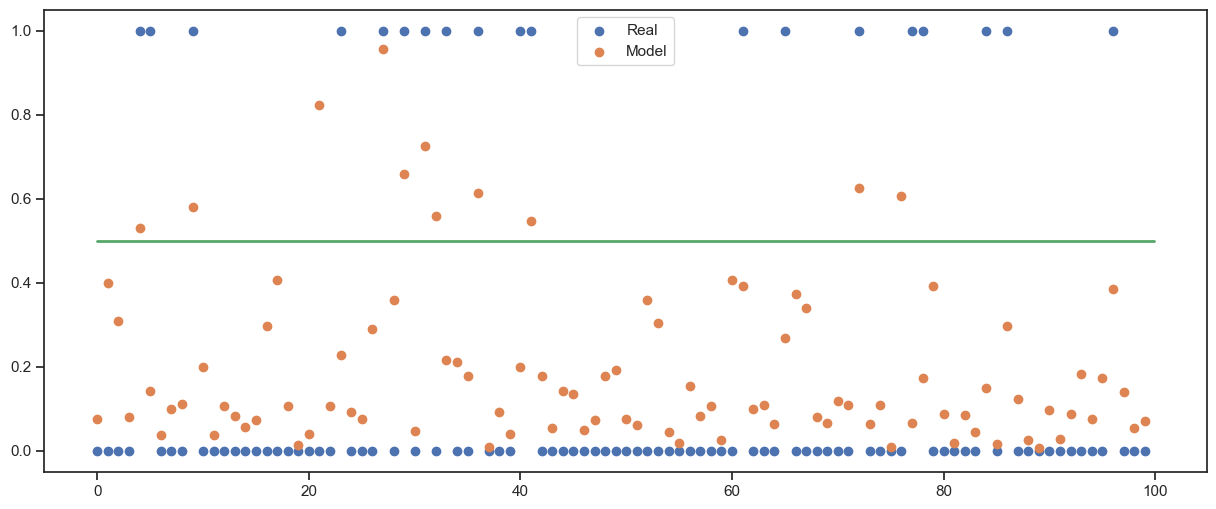

In [72]:
# to visulaise more simply, only express 100points samples
# compared between real test data and predicted data
plt.figure(figsize=(15,6))
#ax = plt.subplot(20,5,1)


plt.scatter(vis_input_res[:100], vis_out_real_res[:100], label="Real")
plt.scatter(vis_input_res[:100], vis_out_pred_res[:100], label="Model")

x=np.arange(0, 100, 0.1)
def f(x):
    return (x-x+1)*0.5

plt.plot(x,f(x), linewidth=2, color='g')
plt.legend()
plt.show()

#plt.tight_layout()
#plt.savefig("fig_BLR.png")

## 3) Modeling - KNN

In [73]:
# standise test input data
def standardise(data_matrix):
    row_of_means = np.mean(data_matrix, axis=0)
    standardised_matrix = data_matrix - row_of_means
    row_of_stds = np.std(standardised_matrix, axis=0)
    return (standardised_matrix / row_of_stds), row_of_means, row_of_stds


def de_standardise(standardised_matrix, row_of_means, row_of_stds):
    matrix = np.copy(standardised_matrix * row_of_stds)
    return matrix + row_of_means 

In [74]:
# log transform input matrix
def log_trans(data_matrix):
    return np.log1p(data_matrix)

In [75]:
# compute the pairwise distance between from_data and to_data
def pairwise_distances(from_data, to_data):
    return np.sqrt(np.sum((from_data[:, np.newaxis, :] - to_data[np.newaxis, :, :])**2,axis=2))


In [91]:
# the function that return the predicted labels of test input data corresponding the number of neighbours
def nearest_neighbour_classification(testing_inputs, training_inputs,training_outputs, no_of_neighbours):
    
    # fcompute the pairwise distance between test input data and train input data
    distances = pairwise_distances(testing_inputs, training_inputs)
    #print(distances)
    
    # assume Test data = [1,2,3], Train data = [-3,-2,-1,0,1,10,11], Train label = [0,0,1,0,1,0,0]
    no_of_classes = 1 + np.max(training_outputs) #the number of labels = 2
    sorted_indices = np.argsort(distances)  # [4,3,2,1,0,5,6] <- the result of Test data 1
    #print("0: " ,sorted_indices)
    
    no_of_inputs = len(testing_inputs) 
    no_of_points = len(training_inputs)
    
    new_array_to_sort = np.broadcast_to(training_outputs,(no_of_inputs, no_of_points)) # [0,0,1,0,1,0,0]
    #print("1: " ,new_array_to_sort)
     
    sorted_labels = np.take_along_axis(new_array_to_sort,sorted_indices, 1) # [1,0,1,0,0,0,0]
    #print("2: " ,sorted_labels)
    
    predicted_labels=np.zeros(no_of_inputs,int) #[0]
    for id_input in range(no_of_inputs):
        
        probability_labels=np.zeros(no_of_classes,float) #[0,0]
        
        for id_neighbor in range(0,no_of_neighbours): 
            # assign the probability of each label
            probability_labels[sorted_labels[id_input][id_neighbor]]+=1./no_of_neighbours #[5/7,2/7]
            #print("3: " ,probability_labels)
        # assign the index that the probability is the largest
        predicted_labels[id_input]=np.argmax(probability_labels) # the predicted label is 0 of Test data 1
        #print("4: " ,predicted_labels)
    
    
    return predicted_labels

In [77]:
def classification_accuracy(estimated_labels, true_labels):
    equal_labels = estimated_labels == true_labels # this returns an array made of true and false 
    return np.mean(equal_labels) # the average is how many true we have

In [78]:
# define KFold index range
def KFold_split(data_size, K):
    np.random.seed(123456789)
    indexes = np.random.permutation(data_size)
    m, r = divmod(data_size, K)
    indexes_split = [
        indexes[i * m + min(i, r):(i + 1) * m + min(i + 1, r)]
        for i in range(K)
    ]
    return indexes_split


def KFold_cross_validation_knn(data_inputs, data_outputs, K, labels_evaluation,
                           missclassification_evaluation,knn):
    #print("test :", K)
    data_size = len(data_inputs)
    # assign the index range according to K
    indexes_split = KFold_split(data_size, K)

    average_accuracy = 0
    for i in range(K):
        training_indexes = np.concatenate([indexes_split[j] for j in range(K) if (j != i)])
        
        # get predicted labels of test input data from training data
        predicted_labels = labels_evaluation(data_inputs[indexes_split[i]],
                                             data_inputs[training_indexes],
                                             data_outputs[training_indexes],knn)
        # get the accuracy 
        accuracy = missclassification_evaluation(predicted_labels,
                                              data_outputs[indexes_split[i]])
        average_accuracy += accuracy / K
    # to see the accuracy return the accuracy
    #error = 1.-average_accuracy
    return average_accuracy

In [79]:
# return the index that has the greatest accuracy (this means the optimal number of neighbours ) 
def grid_search(objective, grid):
    values = np.array([])
    for point in grid:
        values = np.append(values, objective(point))
    return grid[np.argmax(values)]

In [87]:
# after K-Fold_cross_validation, do KNN
# the process of KNN function below is 
# step1) K-Fold cross validation (separating test and train data)
# step2) with neighbours from 1 to 20, do nearest_neighbour_classification and get the accuracy with each number of neighbours
# step3) find out the number of neighbours which has the greast accuracy (this is the optimal number of neighbours) 
# step4) get the accuracy with the optimal number of neighbours
def KNN(input_knn, target, K):
    
    #data_size = len(input_knn)
    # set neigbours range from 1 to 20
    Knn = list(range(1,21,1))

    # set nearest_neighbour_classification
    evaluation = lambda testing_data_inputs, training_data_inputs, training_data_outputs, k: nearest_neighbour_classification(testing_data_inputs, training_data_inputs, training_data_outputs, 
                                 no_of_neighbours=k)
    # set calculating the accuracy
    missclassification_evaluation= lambda predicted_labels,true_labels: classification_accuracy(predicted_labels,
                                                                                            true_labels)

    #do KFold cross validation -> nearest_neighbour_classification -> get the accuracy
    K_objective_function = lambda k: KFold_cross_validation_knn(input_knn, target, K, evaluation, 
                                                            missclassification_evaluation, k)
    
    # get the optimal number of neighbours
    optimal_no_of_neighbours = grid_search(K_objective_function, Knn)
    # get the accuracy with the optimal number of neighbours
    optimal_classification_acc = K_objective_function(optimal_no_of_neighbours)

    return optimal_no_of_neighbours, optimal_classification_acc
    

###  3-1) Manipulating Input variables  &  applying KNN
#### case1) all features standised
#### case2) all features log transform
#### main features are defined as input variables which have correlation with 'churn'
#### case3) main features (age, balance, active_member, conuntry_GE) - standised
#### case4) main features  (age, balance, active_member, conuntry_GE) - log_transform
#### case5) main features (age - standised, balance - log_transform, active_member, conuntry_GE - standised) 

In [88]:
# preprocess categorical data to binary columns
credit_score = np.array(bank['credit_score'])
country = np.array(bank['country'])
country_FR = np.where(country == 'France', 1, 0).astype(int)
country_GE = np.where(country == 'Germany', 1, 0).astype(int)
country_SP = np.where(country == 'Spain', 1, 0).astype(int)
gender = np.array(bank['gender'])
gender_M = np.where(gender == 'Male', 1, 0).astype(int)
gender_F = np.where(gender == 'Female', 1, 0).astype(int)
age = np.array(bank['age'])
tenure = np.array(bank['tenure'])
balance = np.array(bank['balance'])
products_number = np.array(bank['products_number'])
credit_card = np.array(bank['credit_card'])
active_member = np.array(bank['active_member'])
estimated_salary = np.array(bank['estimated_salary'])
churn = np.array(bank['churn'])

In [89]:
# features transform
target = np.array(bank['churn'])
# case1
input_var = np.c_[credit_score, age, tenure, balance,products_number, credit_card, active_member, estimated_salary 
                  ,country_FR, country_GE, country_SP, gender_M, gender_F]
input_std, row_of_means, row_of_stds = standardise(input_var)

# case2
input_log = log_trans(input_var)

# case3
input_mf_var = np.c_[age, balance, active_member, country_GE]
input_mf_std, row_of_means, row_of_stds = standardise(input_mf_var)

# case4
input_mf_log = log_trans(input_mf_var)

# case5
# log transform only for 'balance', since log transform is effctive for biased data
input_mf_mix = np.c_[input_mf_std[:,0], input_mf_log[:,1], input_mf_std[:,2], input_mf_std[:,3]]


In [92]:
# Do 5-Fold cross validaion! & do KNN!
input_knn_list = [input_std, input_log, input_mf_std, input_mf_log, input_mf_mix]
i=1

for var in input_knn_list:
    print("case",i,") (optimal K, accuracy) : " ,KNN(var, target, 5))
    i += 1
    
# Interestingly, main features log_transformed is the best opposite to Binomial Logistic Regression!!!

case 1 ) (optimal K, accuracy) :  (13, 0.8314999999999999)
case 2 ) (optimal K, accuracy) :  (6, 0.8127000000000001)
case 3 ) (optimal K, accuracy) :  (18, 0.8344)
case 4 ) (optimal K, accuracy) :  (19, 0.8353)
case 5 ) (optimal K, accuracy) :  (19, 0.8341999999999999)


###  3-2) Eliminating outliers  &  applying KNN
#### case6) after removing outliers(age, balance), all features standised
#### case7) after removing outliers(age, balance), all features log_transform
#### case8) after removing outliers(age, balance), main features (age, balance, active_member) - standised
#### case9) after removing outliers(age, balance), main features (age, balance, active_member) - log_transform
#### case10) after removing outliers(age, balance), main features (age - standised, balance - log_transform, active_member, conuntry_GE - standised)

####  3-2-1) after removing outliers not distingusg 'churn' value, apply cases above to model

In [93]:
# preprocess categorical data to binary columns
credit_score = np.array(bank_rem['credit_score'])
country = np.array(bank_rem['country'])
country_FR = np.where(country == 'France', 1, 0).astype(int)
country_GE = np.where(country == 'Germany', 1, 0).astype(int)
country_SP = np.where(country == 'Spain', 1, 0).astype(int)
gender = np.array(bank_rem['gender'])
gender_M = np.where(gender == 'Male', 1, 0).astype(int)
gender_F = np.where(gender == 'Female', 1, 0).astype(int)
age = np.array(bank_rem['age'])
tenure = np.array(bank_rem['tenure'])
balance = np.array(bank_rem['balance'])
products_number = np.array(bank_rem['products_number'])
credit_card = np.array(bank_rem['credit_card'])
active_member = np.array(bank_rem['active_member'])
estimated_salary = np.array(bank_rem['estimated_salary'])
churn = np.array(bank_rem['churn'])



In [94]:
target = np.array(bank_rem['churn'])

# features transform
# case6
input_var = np.c_[credit_score, age, tenure, balance,products_number, credit_card, active_member, estimated_salary 
                  ,country_FR, country_GE, country_SP, gender_M, gender_F]
input_std, row_of_means, row_of_stds = standardise(input_var)

# case7
input_log = log_trans(input_var)

# case8
input_mf_var = np.c_[age, balance, active_member, country_GE]
input_mf_std, row_of_means, row_of_stds = standardise(input_mf_var)

# case9
input_mf_log = log_trans(input_mf_var)

# case10
# log transform only for 'balance', since log transform is effctive for biased data
input_mf_mix = np.c_[input_mf_std[:,0], input_mf_log[:,1], input_mf_std[:,2], input_mf_std[:,3]]


In [95]:
# Do 5-Fold cross validaion! & do KNN!

input_knn_list = [input_std, input_log, input_mf_std, input_mf_log, input_mf_mix]
i=6

for var in input_knn_list:
    print("case",i,") (optimal K, accuracy) : " ,KNN(var, target, 5))
    i += 1

# there is no effect with eliminating outliers at all! Why?  
# in regression, eliminating outliers is effective! 

case 6 ) (optimal K, accuracy) :  (13, 0.8371752263351697)
case 7 ) (optimal K, accuracy) :  (13, 0.8092827597663279)
case 8 ) (optimal K, accuracy) :  (17, 0.8383326227193444)
case 9 ) (optimal K, accuracy) :  (19, 0.8398065837924638)
case 10 ) (optimal K, accuracy) :  (16, 0.8380166117555857)


#### 3-2-2) after removing outliers in 'age' at only 'churn'==1, apply cases above to model

In [96]:
# preprocess categorical data to binary columns
credit_score = np.array(bank_rem1['credit_score'])
country = np.array(bank_rem1['country'])
country_FR = np.where(country == 'France', 1, 0).astype(int)
country_GE = np.where(country == 'Germany', 1, 0).astype(int)
country_SP = np.where(country == 'Spain', 1, 0).astype(int)
gender = np.array(bank_rem1['gender'])
gender_M = np.where(gender == 'Male', 1, 0).astype(int)
gender_F = np.where(gender == 'Female', 1, 0).astype(int)
age = np.array(bank_rem1['age'])
tenure = np.array(bank_rem1['tenure'])
balance = np.array(bank_rem1['balance'])
products_number = np.array(bank_rem1['products_number'])
credit_card = np.array(bank_rem1['credit_card'])
active_member = np.array(bank_rem1['active_member'])
estimated_salary = np.array(bank_rem1['estimated_salary'])
churn = np.array(bank_rem1['churn'])

In [97]:
target = np.array(bank_rem1['churn'])

# features transform
# case11
input_var = np.c_[credit_score, age, tenure, balance,products_number, credit_card, active_member, estimated_salary 
                  ,country_FR, country_GE, country_SP, gender_M, gender_F]
input_std, row_of_means, row_of_stds = standardise(input_var)

# case12
input_log = log_trans(input_var)

# case13
input_mf_var = np.c_[age, balance, active_member, country_GE]
input_mf_std, row_of_means, row_of_stds = standardise(input_mf_var)

# case14
input_mf_log = log_trans(input_mf_var)

# case15
# log transform only for 'balance', since log transform is effctive for biased data
input_mf_mix = np.c_[input_mf_std[:,0], input_mf_log[:,1], input_mf_std[:,2], input_mf_std[:,3]]


In [98]:
# Do 5-Fold cross validaion! & do KNN!

input_knn_list = [input_std, input_log, input_mf_std, input_mf_log, input_mf_mix]
i=11

for var in input_knn_list:
    print("case",i,") (optimal K, accuracy) : " ,KNN(var, target, 5))
    i += 1

# mostly, the accuracy is much better after eliminating outliers.
# interestingly, models with main features is better except input variables log transformed

case 11 ) (optimal K, accuracy) :  (11, 0.8342851614759477)
case 12 ) (optimal K, accuracy) :  (11, 0.8156612797073488)
case 13 ) (optimal K, accuracy) :  (18, 0.8376899683860124)
case 14 ) (optimal K, accuracy) :  (20, 0.8361882162583214)
case 15 ) (optimal K, accuracy) :  (20, 0.8350863632786516)


### 3-3) Eliminating outliers in age & replacing balance to mean(balance) & applying KNN
#### case16) after removing outliers(age, balance), all features standised
#### case17) after removing outliers(age, balance), all features log_transform
#### case18) after removing outliers(age, balance), main features (age, balance, active_member) - standised
#### case19) after removing outliers(age, balance), main features (age, balance, active_member) - log_transform
#### case20) after removing outliers(age, balance), main features (age - standised, balance - log_transform, active_member, conuntry_GE - standised)

In [99]:
bank_rem2 = bank_rem.copy()
credit_score = np.array(bank_rem2['credit_score'])
country = np.array(bank_rem2['country'])
country_FR = np.where(country == 'France', 1, 0).astype(int)
country_GE = np.where(country == 'Germany', 1, 0).astype(int)
country_SP = np.where(country == 'Spain', 1, 0).astype(int)
gender = np.array(bank_rem2['gender'])
gender_M = np.where(gender == 'Male', 1, 0).astype(int)
gender_F = np.where(gender == 'Female', 1, 0).astype(int)
age = np.array(bank_rem2['age'])
tenure = np.array(bank_rem2['tenure'])
balance = np.array(bank_rem2['balance'])
products_number = np.array(bank_rem2['products_number'])
credit_card = np.array(bank_rem2['credit_card'])
active_member = np.array(bank_rem2['active_member'])
estimated_salary = np.array(bank_rem2['estimated_salary'])
churn = np.array(bank_rem2['churn'])




In [100]:
# features transform

mean = bank_rem2['balance'].mean()
bank_rem2['balance'] = bank_rem2['balance'].where(bank_rem2['balance'] == 0, mean)

# replace balance to mean value
balance = np.array(bank_rem2['balance'])
target_var = churn.reshape(-1, 1)

# case16
input_var = np.c_[credit_score, age, tenure, balance,products_number, credit_card, active_member, estimated_salary 
                  ,country_FR, country_GE, country_SP, gender_M, gender_F]
input_std, row_of_means, row_of_stds = standardise(input_var)

# case17
input_log = log_trans(input_var)

# case18
input_mf_var = np.c_[age, balance, active_member, country_GE]
input_mf_std, row_of_means, row_of_stds = standardise(input_mf_var)

# case19
input_mf_log = log_trans(input_mf_var)

# case20
# log transform only for 'balance', since log transform is effctive for biased data
input_mf_mix = np.c_[input_mf_std[:,0], input_mf_log[:,1], input_mf_std[:,2], input_mf_std[:,3]]



In [101]:
# Do 5-Fold cross validaion! & do logistic regression!

input_knn_list = [input_std, input_log, input_mf_std, input_mf_log, input_mf_mix]
i=16

for var in input_knn_list:
    print("case",i,") (optimal K, accuracy) : " ,KNN(var, target, 5))
    i += 1

# ???? which effect????!!!!!

case 16 ) (optimal K, accuracy) :  (19, 0.8370701846673496)
case 17 ) (optimal K, accuracy) :  (11, 0.8081249204020045)
case 18 ) (optimal K, accuracy) :  (20, 0.8343334533071236)
case 19 ) (optimal K, accuracy) :  (20, 0.8337019297322739)
case 20 ) (optimal K, accuracy) :  (20, 0.8350702954123869)


### PCA test 
#### PCA is much better than my feature selection??!

In [102]:
from sklearn.decomposition import PCA

credit_score = np.array(bank['credit_score'])
country = np.array(bank['country'])
country_FR = np.where(country == 'France', 1, 0).astype(int)
country_GE = np.where(country == 'Germany', 1, 0).astype(int)
country_SP = np.where(country == 'Spain', 1, 0).astype(int)
gender = np.array(bank['gender'])
gender_M = np.where(gender == 'Male', 1, 0).astype(int)
gender_F = np.where(gender == 'Female', 1, 0).astype(int)
age = np.array(bank['age'])
tenure = np.array(bank['tenure'])
balance = np.array(bank['balance'])
products_number = np.array(bank['products_number'])
credit_card = np.array(bank['credit_card'])
active_member = np.array(bank['active_member'])
estimated_salary = np.array(bank['estimated_salary'])

target = np.array(bank['churn'])

# features transform (standadisation)
input_var = np.c_[credit_score, age, tenure, balance,products_number, credit_card, active_member, estimated_salary 
                  ,country_FR, country_GE, country_SP, gender_M, gender_F]
input_std, row_of_means, row_of_stds = standardise(input_var)



#### variable with PCA, then do Binomial Logistic REgression

In [103]:

pca = PCA(n_components = 2)
pca.fit(input_std)
bank_pca = pca.transform(input_std)

print(bank_pca)

churn = np.array(bank['churn'])
target_var = churn.reshape(-1, 1)

print(KFold_cross_validation_BLR(bank_pca, target_var, 5, 0))

[[ 1.38792804 -1.56062949]
 [ 1.50334825  0.49769218]
 [ 1.5461081  -0.94681852]
 ...
 [ 1.33645451 -1.60475132]
 [-0.98379889  1.58006098]
 [ 1.43610991 -0.61732671]]
0.7963


#### variable with PCA, then do KNN

In [104]:
pca = PCA(n_components = 2)
pca.fit(input_std)
bank_pca = pca.transform(input_std)

print(KNN(bank_pca, target, 5))

(19, 0.8147000000000001)


### Apply LGBM feature importace??!
#### It's the hottest algorithm these days, so just want to try this algorithm and compare to my model

In [105]:
input_std

array([[-0.32622142,  0.29351742, -1.04175968, ..., -0.57380915,
        -1.09598752,  1.09598752],
       [-0.44003595,  0.19816383, -1.38753759, ...,  1.74273971,
        -1.09598752,  1.09598752],
       [-1.53679418,  0.29351742,  1.03290776, ..., -0.57380915,
        -1.09598752,  1.09598752],
       ...,
       [ 0.60498839, -0.27860412,  0.68712986, ..., -0.57380915,
        -1.09598752,  1.09598752],
       [ 1.25683526,  0.29351742, -0.69598177, ..., -0.57380915,
         0.91241915, -0.91241915],
       [ 1.46377078, -1.04143285, -0.35020386, ..., -0.57380915,
        -1.09598752,  1.09598752]])

In [106]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
# define the function that print out the Confusion matrix
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall =  recall_score(y_test, pred)
    print("matrix")
    print(confusion)
    print('accuracy : {0:.4f}, precision : {1:.4f}, recall: {2:.4f}'.format(accuracy, precision, recall))

In [107]:
# do LGBM classification
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split

ftr = input_std
#ftr = input_var
tar = target

X_train, X_test, y_train, y_test = train_test_split(ftr, tar, test_size=0.2, random_state=156)
lgbm_wrapper = LGBMClassifier(n_estimators=400)

evals = [(X_test, y_test)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", eval_set=evals, verbose=True)
preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:,1]


get_clf_eval(y_test, preds)

[1]	valid_0's binary_logloss: 0.482927
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.458397
[3]	valid_0's binary_logloss: 0.439569
[4]	valid_0's binary_logloss: 0.424279
[5]	valid_0's binary_logloss: 0.412302
[6]	valid_0's binary_logloss: 0.401711
[7]	valid_0's binary_logloss: 0.393333
[8]	valid_0's binary_logloss: 0.386185
[9]	valid_0's binary_logloss: 0.37985
[10]	valid_0's binary_logloss: 0.37438
[11]	valid_0's binary_logloss: 0.369616
[12]	valid_0's binary_logloss: 0.365235
[13]	valid_0's binary_logloss: 0.361624
[14]	valid_0's binary_logloss: 0.358082
[15]	valid_0's binary_logloss: 0.356195
[16]	valid_0's binary_logloss: 0.35424
[17]	valid_0's binary_logloss: 0.35104
[18]	valid_0's binary_logloss: 0.3491
[19]	valid_0's binary_logloss: 0.347464
[20]	valid_0's binary_logloss: 0.346189
[21]	valid_0's binary_logloss: 0.344095
[22]	valid_0's binary_logloss: 0.342763
[23]	valid_0's binary_logloss: 0.341772
[24]	valid_0's binary_logloss: 0.

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

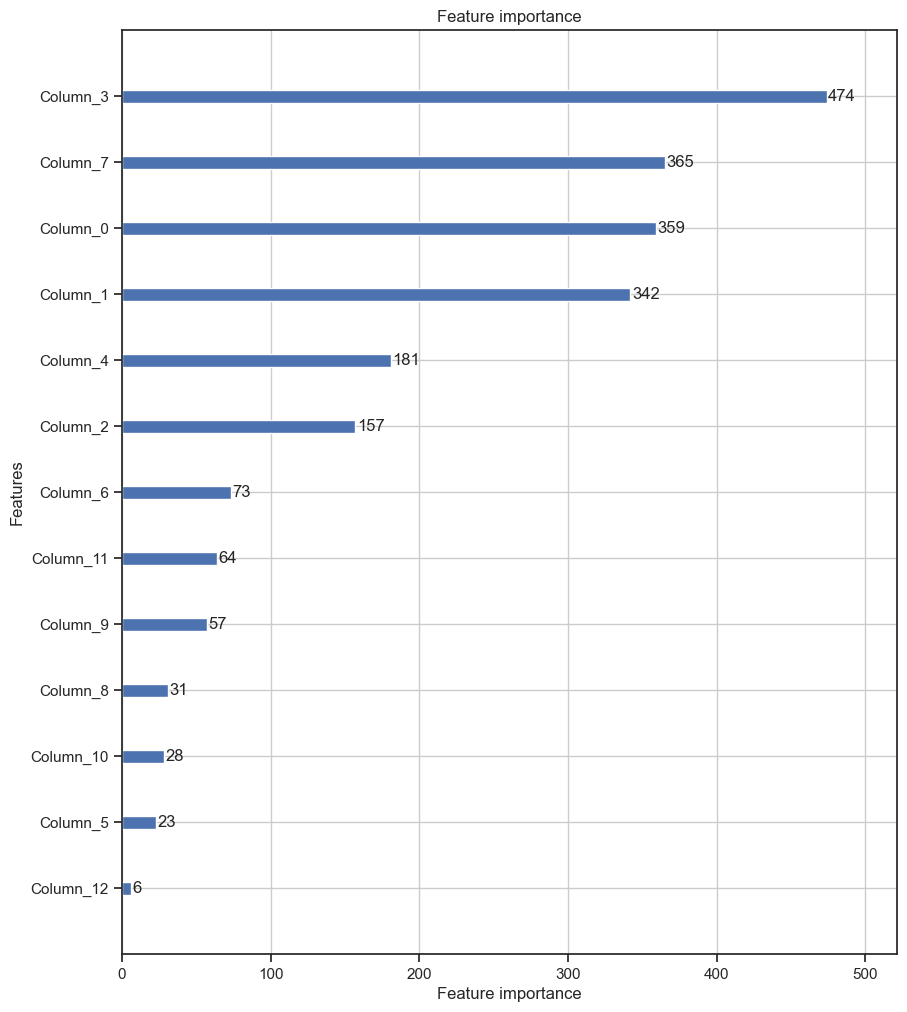

In [108]:
# plot the feature importance
from lightgbm import plot_importance 

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgbm_wrapper, ax=ax)

#plt.savefig("FI.png")

#### pick up four features that feature importance is larger to compare to my model

In [109]:
input_var = np.c_[credit_score, age, balance,active_member]
input_std, row_of_means, row_of_stds = standardise(input_var)

ftr = input_var
tar = target

X_train, X_test, y_train, y_test = train_test_split(ftr, tar, test_size=0.2, random_state=156)
lgbm_wrapper = LGBMClassifier(n_estimators=400)

evals = [(X_test, y_test)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", eval_set=evals, verbose=True)
preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:,1]

get_clf_eval(y_test, preds)

[1]	valid_0's binary_logloss: 0.49595
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.478652
[3]	valid_0's binary_logloss: 0.46573
[4]	valid_0's binary_logloss: 0.455621
[5]	valid_0's binary_logloss: 0.447271
[6]	valid_0's binary_logloss: 0.44072
[7]	valid_0's binary_logloss: 0.435248
[8]	valid_0's binary_logloss: 0.430491
[9]	valid_0's binary_logloss: 0.426754
[10]	valid_0's binary_logloss: 0.423274
[11]	valid_0's binary_logloss: 0.420762
[12]	valid_0's binary_logloss: 0.41835
[13]	valid_0's binary_logloss: 0.416338
[14]	valid_0's binary_logloss: 0.415391
[15]	valid_0's binary_logloss: 0.413771
[16]	valid_0's binary_logloss: 0.412658
[17]	valid_0's binary_logloss: 0.412268
[18]	valid_0's binary_logloss: 0.411392
[19]	valid_0's binary_logloss: 0.41123
[20]	valid_0's binary_logloss: 0.410428
[21]	valid_0's binary_logloss: 0.409633
[22]	valid_0's binary_logloss: 0.408919
[23]	valid_0's binary_logloss: 0.408763
[24]	valid_0's binary_logloss: 0